In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install mglearn #시각화모듈

ERROR: Invalid requirement: '#시각화모듈'


X.shape: (26, 2)


C:\Users\82106\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


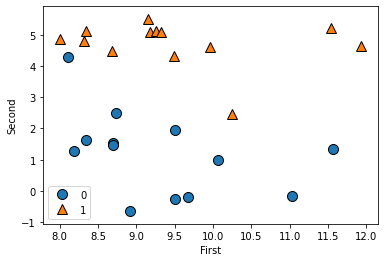

In [3]:
# 지도학습 알고리즘 supervised learn
import mglearn
X, y= mglearn.datasets.make_forge() # X=feature y=label forge데이터셋

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('First')
plt.ylabel('Second')
plt.legend()
print('X.shape:',X.shape)

(40, 1)


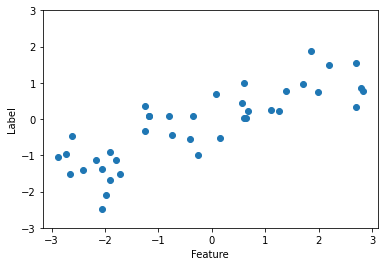

In [4]:
# 분포를 보여주는 샘플을 만들 때 사용, 샘플의 갯수 지정 가능
X, y= mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')
plt.ylim(-3,3)


plt.xlabel('Feature')
plt.ylabel('Label')
print(X.shape)

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys()) #다른 데이터들도 가지는 기본틀같음

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
cancer.data.shape

(569, 30)

In [7]:
#cancer.target 
print(cancer.target_names) #malignant 양성 benign 음성
print(cancer.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


C:\Users\82106\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


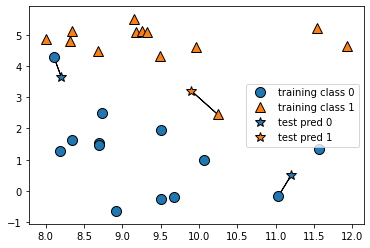

In [8]:
 mglearn.plots.plot_knn_classification(n_neighbors=1) #최근접 알고리즘,  홀수 단위로 하는것을 추천

C:\Users\82106\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


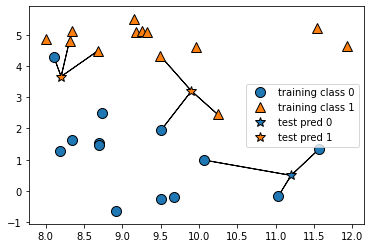

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\82106\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5) #파라미터 반드시 저장해야됨

In [12]:
clf.fit(X_train, y_train) #학습하는 단계

KNeighborsClassifier()

In [13]:
clf.predict(X_test) # 학률 리스트 반환 (예측)

array([1, 0, 1, 0, 1, 0, 0])

In [14]:
clf.score(X_test, y_test) #정확도 보는것

0.8571428571428571

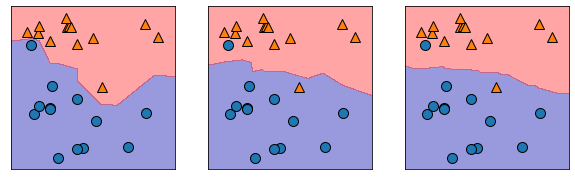

In [15]:
fig, axes = plt.subplots(1,3, figsize=(10,3)) #값이 fig와 축에 리턴된다 subplot: 한라인에 그림 여러개 그릴수있음 plot은 그냥 그리는것
#fig=figure 그림
# axes 축 axis 중심축 = 그림에 대한 축
for n_neighbors, ax in zip([1,3,9], axes): #zip 함수 : 결합
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X,y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4) #배경
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax) #점들
#1개짜리는 속성이 두드러지게 보이고 9개짜리로 갈수록 완만해진다. 그렇다고 1개짜리가 제일좋다는 아님

In [16]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=66) #66정도로 해보자 

training_accuracy = [] #정확도가 들어갈 리스트 자리 하나 마련(결과를 담는 저장공간 생성)
test_accuracy = [] #저장공간 하나 더 생성

neighbors_settings = range(1,11) #1~10까지 n_neighbors 적용한 리스트변수 만듬

for n_neighbors in neighbors_settings:  #모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train) 도 가능
    
    training_accuracy.append(clf.score(X_train, y_train)) #학습정확도 or 훈련정확도 학습set 정확도를 저장(append)
    # clf.score(X_train, y_train) 값이 []에 추가된다
    test_accuracy.append(clf.score(X_test, y_test)) #테스트정확도-이쪽이 훨씬 중요=값이 잘나와야됨

In [17]:
print(training_accuracy) #학습데이터는 계속 떨어짐
print(test_accuracy)    #테스트데이터는 비슷하게 유지됨, 둘이 비슷한 확률이 제일 이상적인 결과

[1.0, 0.9671361502347418, 0.9671361502347418, 0.9553990610328639, 0.9483568075117371, 0.9483568075117371, 0.9436619718309859, 0.9413145539906104, 0.9460093896713615, 0.9413145539906104]
[0.9230769230769231, 0.9020979020979021, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]


Text(0, 0.5, 'accuracy')

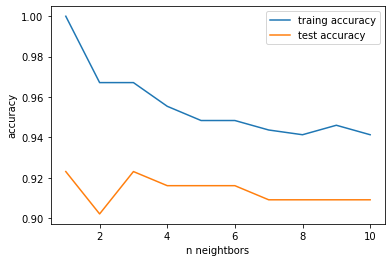

In [18]:
plt.plot(neighbors_settings, training_accuracy, label='traing accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.legend()
plt.xlabel('n neightbors')
plt.ylabel('accuracy')

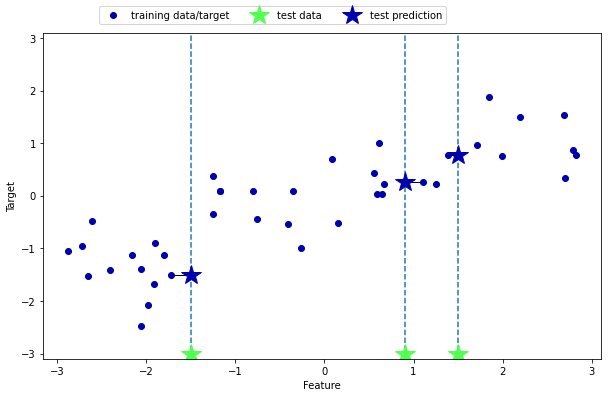

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

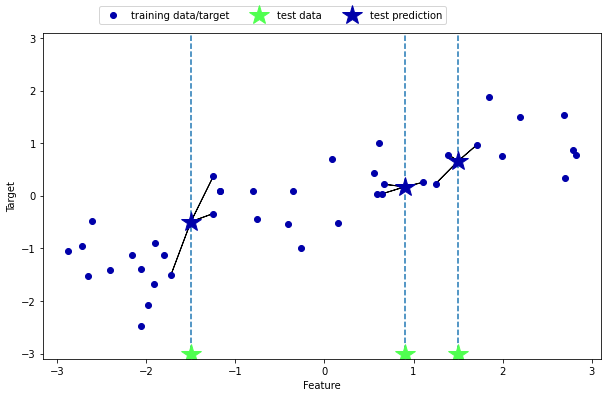

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
from  sklearn.neighbors import KNeighborsRegressor

X, y= mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [22]:
print(reg.predict(X_test)) #결과가 되는 y_test값으로예측하는건 이상해서 안들어감
print(reg.score(X_test, y_test))

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
0.8344172446249605


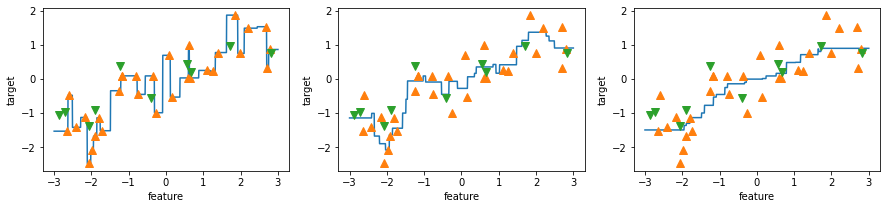

In [23]:
fig, axes = plt.subplots(1,3, figsize=(15,3))

line =  np.linspace(-3, 3 , 1000).reshape(-1,1) #-3에서 3까지의 범위중에 1000개의 데이터를 1000행 1열의 데이터로 나타내는 것
for n_neighbors, ax in zip([1,3,9], axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
#라인 그리기
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', markersize=8)
    ax.plot(X_test, y_test, 'v', markersize=8)
# 1은 전체적으로 안맞고(오버피팅) 3은 얼추맞는것 같고 9는 초반이 불안함(언더핏팅)
    ax.set_xlabel('feature')
    ax.set_ylabel('target')

In [24]:
np.linspace(-3, 3 , 10).reshape(-1,1)

array([[-3.        ],
       [-2.33333333],
       [-1.66666667],
       [-1.        ],
       [-0.33333333],
       [ 0.33333333],
       [ 1.        ],
       [ 1.66666667],
       [ 2.33333333],
       [ 3.        ]])

w[0]: 0.393906  b: -0.031804


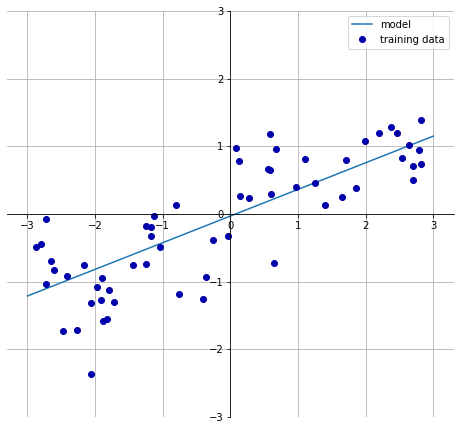

In [25]:
mglearn.plots.plot_linear_regression_wave()
#직선은 점들의 평균값

In [26]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [27]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.6700890315075756
0.65933685968637


In [28]:
print(lr.coef_) #가중치, 기울기
print(lr.intercept_) #편향, 절편

[0.39390555]
-0.031804343026759746


In [29]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

C:\Users\82106\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [30]:
print(lr.score(X_train, y_train)) #학습정확도는 높은데 테스트정확도는 낮음
print(lr.score(X_test,y_test))

0.9520519609032729
0.6074721959665842


In [31]:
#Ridge / 릿지
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print(ridge.score(X_train,y_train)) #학습정확도는 낮은데 테스트정확도는 높음
print(ridge.score(X_test, y_test))

0.8857966585170941
0.7527683481744758


In [50]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train) #alpha 값이 클수록 모델의 구조 단순해짐=일반화

print(ridge10.score(X_train,y_train)) 
print(ridge10.score(X_test, y_test))
print(Ridge(alpha=10).fit(X_train,y_train).score(X_train,y_train))

0.7161220329439151
0.7508310898326861
0.7161220329439151


In [33]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print(ridge01.score(X_train,y_train)) 
print(ridge01.score(X_test, y_test))

0.9282273685001985
0.7722067936480156


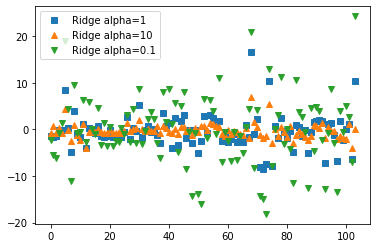

In [34]:
plt.plot(ridge.coef_,'s', label='Ridge alpha=1')
plt.plot(ridge10.coef_,'^', label='Ridge alpha=10')
plt.plot(ridge01.coef_,'v', label='Ridge alpha=0.1')

plt.legend()

In [35]:
#Lasso 라쏘, 회귀 알고리즘의 하나

from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.29323768991114596
0.20937503255272272


In [36]:
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)

print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))

0.8962226511086497
0.7656571174549981


In [37]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)

print(lasso00001.score(X_train, y_train))
print(lasso00001.score(X_test, y_test))

0.9507158754515462
0.6437467421273534


In [38]:
lasso01 = Lasso(alpha=0.1, max_iter=50000).fit(X_train,y_train) 
print(lasso01.score(X_train, y_train))
print(lasso01.score(X_test, y_test))

0.7709955157630053
0.630200997611004


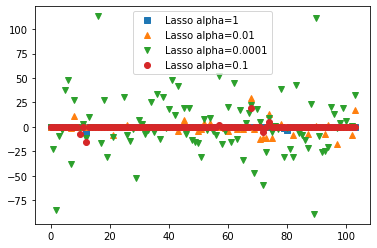

In [39]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1') #결정갯수를 보는 것
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')
plt.plot(lasso01.coef_, 'o', label='Lasso alpha=0.1')
plt.legend()

C:\Users\82106\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


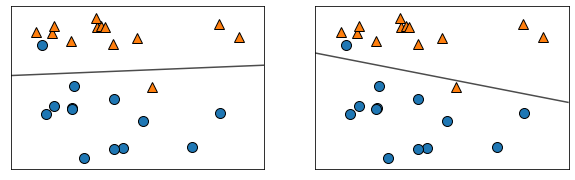

In [40]:
#분류에 대한 선형 모델
from sklearn.linear_model import LogisticRegression
#classificatiion알고리즘임 regressing아님
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X,y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    alpha=0.7, ax=ax)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)

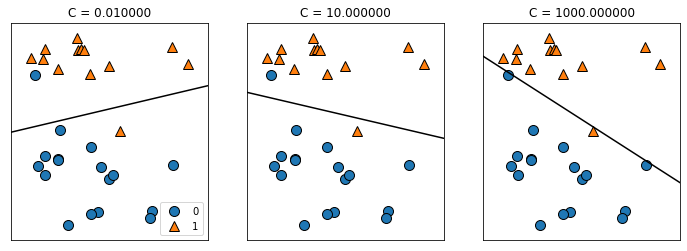

In [41]:
mglearn.plots.plot_linear_svc_regularization() #정규화

In [42]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)

print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9507042253521126
0.965034965034965


C:\Users\82106\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# 충분한 값 까지 찾아서 경고창(빨간창) 안뜸
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test,y_test))

0.960093896713615
0.972027972027972


In [44]:
logreg100 = LogisticRegression(max_iter=5000, C=100).fit(X_train, y_train)

print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test)) #

0.9788732394366197
0.965034965034965


In [45]:
logreg001 = LogisticRegression(max_iter=5000, C=0.01).fit(X_train, y_train)

print(logreg001.score(X_train, y_train))
print(logreg001.score(X_test, y_test))

0.9460093896713615
0.972027972027972


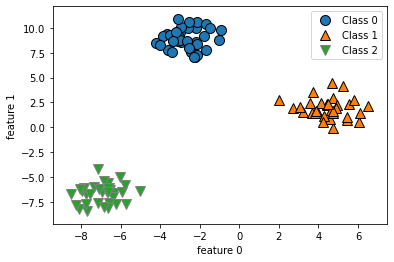

In [46]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1], y) 
# X에 0을 넣은것을 X축으로 X에 1를 넣은것을 y축으로 색상은 y로

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['Class 0','Class 1','Class 2'])